# Music Video Data Analysis

This notebook covers data cleaning, transformation, visualization, and analysis of a dataset containing information about the most viewed music videos of all time. The dataset includes various attributes such as the total views, artist, and video title.

## 1. Import Necessary Libraries

We begin by importing the necessary libraries for data analysis, visualization, and transformation.


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pathlib import Path

# Define paths
project_root = Path().resolve().parent  # assumes notebook is in /notebooks/
datasets_path = project_root / "datasets"
visuals_path = project_root / "visuals"
visuals_path.mkdir(parents=True, exist_ok=True)



In [117]:
# Display the file path
print(f"The dataset is located at: {file_path}")

The dataset is located at: Most viewed music videos of all time.csv


## 2. Load the Dataset

The dataset is loaded into a pandas DataFrame. We will check the initial structure of the data after loading it.


In [ ]:
# Load the dataset from the datasets folder
df = pd.read_csv(datasets_path / "Most viewed music videos of all time.csv")

# Display the first 5 rows
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Delfin\\Python\\Data_Analysis\\datasets\\music_videos.csv'

## 3. Data Cleaning

We clean the data by:
 - Converting the 'Total Views' column to numeric format (removing commas and converting to integers).
 - Extracting artist and song names from the 'Video' column.

In [ ]:
# Convert 'Total Views' to numeric (remove commas and convert to integers)
df['Total Views'] = df['Total Views'].replace({',': ''}, regex=True).astype(int)

# OPTIONAL: Merge with additional artist data if available
try:
    artists_info = pd.read_csv(datasets_path / "artists_info.csv")
    df = df.merge(artists_info, on="Artist", how="left")
    print("Merged dataset with artist info:")
    print(df.head())
except FileNotFoundError:
    print("artists_info.csv not found. Skipping merge step.")

# Extract artist names from 'Video' column (assuming format "Artist - Song")
df['Artist'] = df['Video'].str.split(' - ').str[0]
df['Title'] = df['Video'].str.split(' - ').str[1]


artists_info.csv not found. Skipping merge step.


## 4. Checking for Missing Values

Let's check for any missing values in the dataset and fill any missing numerical values with the mean.


In [ ]:
# Check for missing values
df.isnull().sum()

# Fill missing numerical values with the mean
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)


## 5. Descriptive Statistics

We will now display basic statistics of the dataset, such as mean, standard deviation, etc.


In [ ]:
# Display basic statistics
df.describe()


,Total Views
count,2.500000e+03
mean,7.766757e+08
std,6.021257e+08
min,3.643821e+08
25%,4.423650e+08
50%,5.757849e+08
75%,8.643879e+08
max,8.669536e+09


## 6. Standardization and Normalization

We will standardize and normalize the 'Total Views' column:
- Standardization will convert the values into a standard normal distribution.
- Normalization will scale the values between 0 and 1.


In [ ]:
# Standardization
scaler = StandardScaler()
numeric_columns = ['Total Views']  # Only standardize Total Views
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Normalization (Min-Max)
minmax_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(minmax_scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Join normalized views to the main dataframe
df = df.join(df_normalized, rsuffix="_normalized")

## 7. Categorical Data Distribution

Next, we will examine the unique values in categorical columns to understand the dataset better.


In [ ]:
# Check unique values in categorical columns
df.select_dtypes(include=['object']).nunique()


Video     2498
Artist    1590
Title     2092
dtype: int64

## 8. Data Visualization

We will visualize the following:
1. The distribution of 'Total Views' with a histogram.
2. The spread of views using a boxplot.
3. The top 10 artists by total views.
4. A placeholder for the correlation heatmap.


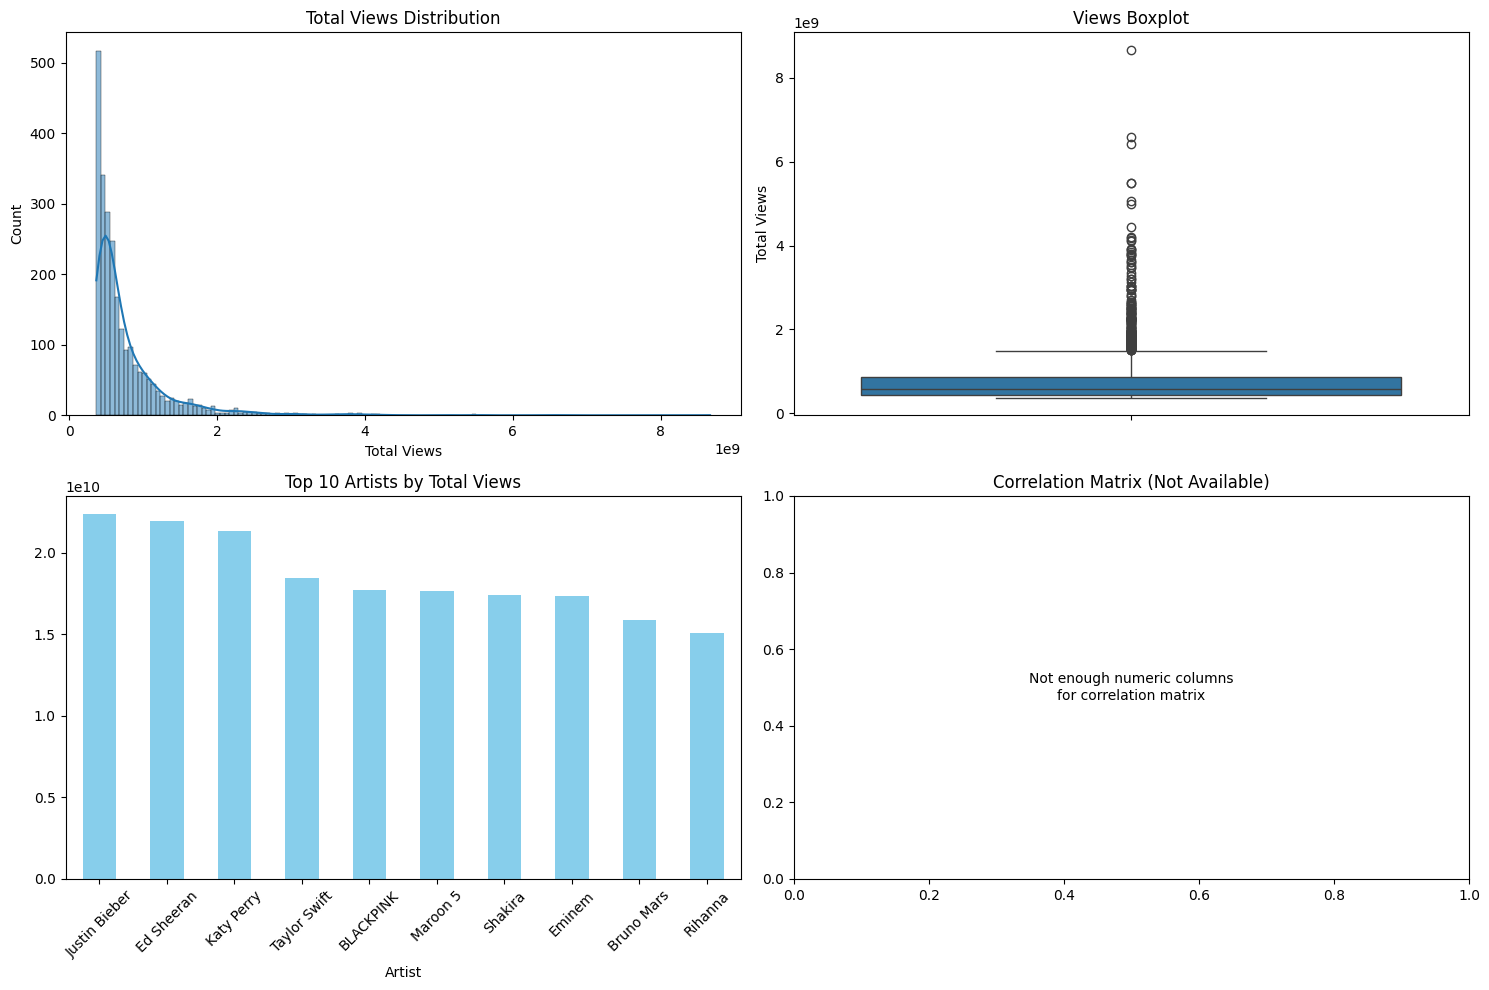

In [ ]:
# ========== DATA VISUALIZATION ==========

plt.figure(figsize=(15, 10))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(df['Total Views'], kde=True)
plt.title("Total Views Distribution")
plt.savefig(visuals_path / "total_views_histogram.png")

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(data=df, y='Total Views')
plt.title("Views Boxplot")
plt.savefig(visuals_path / "total_views_boxplot.png")


# Top 10 Artists by Views
plt.subplot(2, 2, 3)
top_artists = df.groupby('Artist')['Total Views'].sum().nlargest(10)
top_artists.plot(kind='bar', color='skyblue')
plt.title("Top 10 Artists by Total Views")
plt.xticks(rotation=45)
plt.savefig(visuals_path / "top_10_artists_bar.png")

# Correlation Heatmap (since we only have one numeric column, this will be empty)
plt.subplot(2, 2, 4)
plt.text(0.5, 0.5, 'Not enough numeric columns\nfor correlation matrix', 
         ha='center', va='center')
plt.title("Correlation Matrix (Not Available)")

plt.tight_layout()
plt.savefig(visuals_path / "summary_4plots.png")
plt.show()


## 9. GroupBy Operations

Now, we will group the data by the 'Artist' column and:
- Show the average views per artist.
- Show the total views per artist.


In [ ]:
# ========== GROUPBY OPERATIONS ==========

# Group by Artist and show mean views
grouped_df = df.groupby('Artist').mean(numeric_only=True)
print("\nAverage Views per Artist:")
print(grouped_df['Total Views'].sort_values(ascending=False).head())

# Group by Artist and show total views
artist_views = df.groupby('Artist')['Total Views'].sum().sort_values(ascending=False)
print("\nTotal Views per Artist:")
print(artist_views.head())



Average Views per Artist:
Artist
El Chombo, Dancing Green Alien                                                                         4.988391e+09
श्री हनुमान चालीसा 🌺🙏| Shree Hanuman Chalisa Original Video |🙏🌺| GULSHAN KUMAR | HARIHARAN |Full HD    4.429926e+09
Passenger | Let Her Go (Official Video)                                                                3.786467e+09
Major Lazer & DJ Snake                                                                                 3.739785e+09
The Gummy Bear Song                                                                                    3.606587e+09
Name: Total Views, dtype: float64

Total Views per Artist:
Artist
Justin Bieber    22373813970
Ed Sheeran       21976634827
Katy Perry       21327572815
Taylor Swift     18446086710
BLACKPINK        17707859436
Name: Total Views, dtype: int64


## 10. Filtering Operations

We will demonstrate filtering techniques using:
- Basic filtering for videos with more than 1 billion views.
- Querying the dataset for videos with views between 500 million and 1 billion.
- Using the `where()` function to filter videos with more than 800 million views.


In [ ]:
# ========== FILTERING OPERATIONS ==========

# Basic filtering
filtered_df = df[df['Total Views'] > 1_000_000_000]
print("\nVideos with >1B views (shape):", filtered_df.shape)

# Using query()
query_df = df.query("`Total Views` > 500000000 and `Total Views` < 1000000000")
print("\nVideos with 500M-1B views (query):")
print(query_df[['Artist', 'Title', 'Total Views']].head())

# Using where()
where_df = df.where(df['Total Views'] > 800000000).dropna()
print("\nVideos with >800M views (where):")
print(where_df[['Artist', 'Title', 'Total Views']].head())



Videos with >1B views (shape): (483, 5)

Videos with 500M-1B views (query):
                                                Artist  \
483                                         The Weeknd   
484  BTS (방탄소년단) '피 땀 눈물 (Blood Sweat & Tears)' Off...   
485                                        Miley Cyrus   
486                                             Halsey   
487                                        Miley Cyrus   

                                 Title  Total Views  
483  Call Out My Name (Official Video)    997326240  
484                                NaN    997162269  
485           Flowers (Official Video)    996882865  
486                         Without Me    995459472  
487     We Can't Stop (Official Video)    994283797  

Videos with >800M views (where):
        Artist                                              Title  \
0   Luis Fonsi                         Despacito ft. Daddy Yankee   
1  Wiz Khalifa  See You Again ft. Charlie Puth [Official Video...   
2   Ed Sh

## 11. Data Analysis

We will analyze the data by:
- Displaying the top 10 most viewed videos.
- Analyzing the distribution of views.
- Identifying the artists with the most videos in the top list.


In [ ]:
# ========== DATA ANALYSIS ==========

# Top 10 most viewed videos
print("\nTop 10 Most Viewed Videos:")
print(df.nlargest(10, 'Total Views')[['Artist', 'Title', 'Total Views']])

# Views distribution analysis
views_stats = df['Total Views'].describe()
print("\nViews Distribution Analysis:")
print(views_stats)

# Artist with most videos in the list
artist_counts = df['Artist'].value_counts()
print("\nArtists with Most Videos in Top List:")
print(artist_counts.head())



Top 10 Most Viewed Videos:
                                              Artist  \
0                                         Luis Fonsi   
1                                        Wiz Khalifa   
2                                         Ed Sheeran   
3                                        Mark Ronson   
4                                                PSY   
5                                         Crazy Frog   
6                     El Chombo, Dancing Green Alien   
7  श्री हनुमान चालीसा 🌺🙏| Shree Hanuman Chalisa O...   
8                                           Maroon 5   
9                                            Shakira   

                                               Title  Total Views  
0                         Despacito ft. Daddy Yankee   8669535825  
1  See You Again ft. Charlie Puth [Official Video...   6595015426  
2                Shape of You (Official Music Video)   6423961815  
3        Uptown Funk (Official Video) ft. Bruno Mars   5500003713  
4              

## 12. Save the Cleaned and Normalized Data

Finally, we save the cleaned and normalized data into CSV files to make it available for future use or sharing.


In [ ]:
# ========== SAVE CLEANED DATA ==========

df.to_csv(datasets_path / "music_videos_cleaned.csv", index=False)
print("\n=== Cleaned dataset saved as 'music_videos_cleaned.csv' ===")

# Additional saving of normalized data
df_normalized.to_csv(datasets_path / "music_videos_normalized.csv", index=False)
print("Normalized dataset saved as 'music_videos_normalized.csv'")



=== Cleaned dataset saved as 'cleaned_dataset.csv' ===
Normalized dataset saved as 'normalized_dataset.csv'
